In [507]:
# Imporing libraries

# Data processing
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Visualization
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Managing Nulls
# ------------------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Statistics
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind, kruskal, kstest
from scikit_posthocs import posthoc_dunn 

# Configuration
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [444]:
# Opening Customer Flight Activity CSV for a scan of the data.

df_flights = pd.read_csv('../Data/Customer Flight Activity.csv')
df_flights.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [445]:
# Checking number of rows and columns in the dataset.

df_flights.shape

(405624, 10)

In [446]:
# Checking for duplicated rows in the dataset.

df_flights.duplicated().sum()

np.int64(1864)

In [447]:
# Doing a more detailed check of duplicated rows.

duplicated_flights = df_flights[df_flights.duplicated(keep=False)]

duplicated_flights

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405111,971370,2018,12,0,0,0,0,0.0,0,0
405409,988392,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0
405436,989528,2018,12,0,0,0,0,0.0,0,0


In [448]:
# Dropping duplicated rows before merging with second data set.

df_flights = df_flights.drop_duplicates()

In [449]:
# Ensuring the duplicated rows were deleted correctly.

df_flights.duplicated().sum()

np.int64(0)

In [450]:
# Opening the Customer Loyalty History CSV for a scan of the data.

df_loyalty = pd.read_csv('../Data/Customer Loyalty History.csv')
df_loyalty.sort_values(by='Loyalty Number').head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
2320,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4502,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
4380,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
167,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
14277,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [451]:
# Checking number of rows and columns in the data set.

df_loyalty.shape

(16737, 16)

In [452]:
# Checking for duplicated rows in the data set.

df_loyalty.duplicated().sum()

np.int64(0)

In [453]:
'''Merging data sets using Loyalty Number as common column. The same customer can book several flights, hence doing a left join to add
customer details to the flights' data set where the Loyalty Number will be duplicated.'''

merged_df = pd.merge(df_flights, df_loyalty, on='Loyalty Number', how='left')

In [454]:
# Checking it merged correctly. Rows are correct as we dropped duplicated and columns have incresed to 25.

merged_df.shape

(403760, 25)

In [455]:
# Analysing the main statistics for the merged data set.

display(merged_df.describe().T)
print('***'*50)
display(merged_df.describe(include='O').T)

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
Flights with Companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
Total Flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
Distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
Points Accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50
Points Redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00


******************************************************************************************************************************************************


,count,unique,top,freq
Country,403760,1,Canada,403760
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Postal Code,403760,55,V6E 3D9,21944
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Marital Status,403760,3,Married,234845
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


In [456]:
# Function to generate an info summary of the data set.

def exploring_dataframe(dataframe):

    print(f"Duplicates in dataset: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    print("Nulls in dataset:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["Null_%"])
    display(df_nulos[df_nulos["Null_%"] > 0])
    print("\n ..................... \n")
    print(f"Column types:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["Data_type"]))
    print("\n ..................... \n")
    print("Values of object columns: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    for col in dataframe_categoricas.columns:
        print(f"Column {col.upper()} has the following unique values:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())

exploring_dataframe(merged_df)

Duplicates in dataset: 0

 ..................... 

Nulls in dataset:


,Null_%
Salary,25.326927
Cancellation Year,87.703091
Cancellation Month,87.703091



 ..................... 

Column types:


,Data_type
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



 ..................... 

Values of object columns: 
Column COUNTRY has the following unique values:


,count
Country,
Canada,403760


Column PROVINCE has the following unique values:


,count
Province,
Ontario,130258
British Columbia,106442
Quebec,79573
Alberta,23360
Manitoba,15900


Column CITY has the following unique values:


,count
City,
Toronto,80775
Vancouver,62314
Montreal,49687
Winnipeg,15900
Whistler,13994


Column POSTAL CODE has the following unique values:


,count
Postal Code,
V6E 3D9,21944
V5R 1W3,16529
V6T 1Y8,13994
V6E 3Z3,13128
M2M 7K8,12855


Column GENDER has the following unique values:


,count
Gender,
Female,202757
Male,201003


Column EDUCATION has the following unique values:


,count
Education,
Bachelor,252567
College,102260
High School or Below,18915
Doctor,17731
Master,12287


Column MARITAL STATUS has the following unique values:


,count
Marital Status,
Married,234845
Single,108153
Divorced,60762


Column LOYALTY CARD has the following unique values:


,count
Loyalty Card,
Star,183745
Nova,136883
Aurora,83132


Column ENROLLMENT TYPE has the following unique values:


,count
Enrollment Type,
Standard,380419
2018 Promotion,23341


# Managing Nulls in the data set

### Cancellation Year and Cancellation Month

In [492]:
'''Cancellation Year and Cancellation Month refer to customers who cancelled their membership in the Loyalty scheme.
This means that Nulls in these columns refer to active customers on the scheme.
Decision: change Nulls for 'Active' in these two columns.'''

merged_df[['Cancellation Year', 'Cancellation Month']] =  merged_df[['Cancellation Year', 'Cancellation Month']].fillna('Active')

# Validating the changes.

print(merged_df['Cancellation Year'].unique())
print(merged_df['Cancellation Month'].unique())

['Active' 2018.0 2015.0 2016.0 2014.0 2013.0 2017.0]
['Active' 3.0 9.0 2.0 7.0 6.0 8.0 4.0 1.0 5.0 11.0 12.0 10.0]


## Salary

In [ ]:
# There are negative salary values. Creating a variable to explore rows with negative values.

merged_df_negative_salary = merged_df[merged_df['Salary'] < 0]
print(f'There are {len(merged_df_negative_salary)} rows with negative salary values.')

There are 480 rows with negative salary values.


In [494]:
# Displaying stats for negative and positive salary values.
print('Negative salary values: Stats.')
print(merged_df_negative_salary['Salary'].describe())
print('*****'*20)
print('Positive salary values: Stats.')
merged_df_positive_salary = merged_df[merged_df['Salary'] > 0]
print(merged_df_positive_salary['Salary'].describe())

Negative salary values: Stats.
count      480.000000
mean    -35538.250000
std      15620.359282
min     -58486.000000
25%     -46839.750000
50%     -41368.500000
75%     -19330.250000
max      -9081.000000
Name: Salary, dtype: float64
****************************************************************************************************
Positive salary values: Stats.
count    301500.000000
mean      79371.732902
std       34726.433958
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: Salary, dtype: float64


In [ ]:
# Negative salary values range from -9,081 to -58,486. Decision: convert negative salary values into absolute values.

merged_df['Salary'] = merged_df['Salary'].abs()

In [461]:
# Checking that the changes were made.

merged_df['Salary'].describe()

count    301500.000000
mean      79371.732902
std       34726.433958
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: Salary, dtype: float64

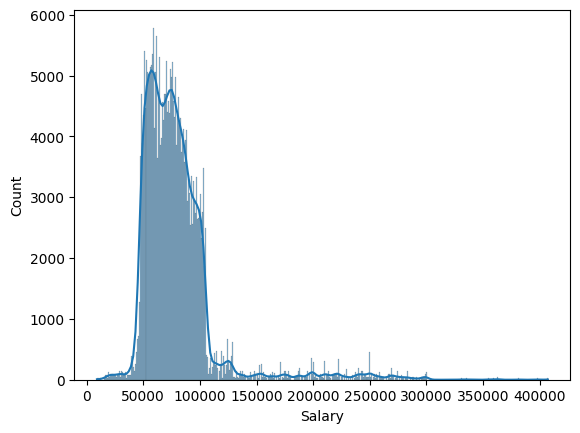

In [ ]:
# Checking distribution of salary to decide what to do with Nulls.
# From the below histogram, it seems like salary data doesn't follow a normal distribution.

sns.histplot(x='Salary', data=merged_df, kde=True);

In [495]:
# Exploring nulls in detail.

df_salary_null = merged_df[merged_df['Salary'].isna()]

df_salary_null.describe(include='O').T

,count,unique,top,freq
Country,102260,1,Canada,102260
Province,102260,11,Ontario,33480
City,102260,29,Toronto,20224
Postal Code,102260,55,V6E 3D9,5734
Gender,102260,2,Male,51898
Education,102260,1,College,102260
Marital Status,102260,3,Single,58527
Loyalty Card,102260,3,Star,50863
Enrollment Type,102260,2,Standard,96541
Cancellation Year,102260,7,Active,89605


### Conclusion: Null values in the 'Salary' column indicate that the customer chose not to disclose their salary information. Moreover, there is no clear pattern to easily replace these missing values. The dataset contains 29 unique cities and 55 distinct postal codes. One potential approach to imputing the missing salary data is to use K-Nearest Neighbors (KNN), leveraging the available values in other columns to predict the missing salary entries. However, this method would be computationally intensive and is not aligned with the objectives of this exercise.

In [ ]:
# Commenting out this cell. KNN requires additional columns to compare variables and predict missing data. 
# Given the size of this dataset and the time required for execution, we have decided not to use this method.

'''imputer_knn = KNNImputer(n_neighbors = 10)

imputer_knn_imputado = imputer_knn.fit_transform(merged_df_copy[["Salary"]])

imputer_knn_imputado'''

'imputer_knn = KNNImputer(n_neighbors = 10)\n\nimputer_knn_imputado = imputer_knn.fit_transform(merged_df_copy[["Salary"]])\n\nimputer_knn_imputado'

# Changing column data type where applicable

In [467]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

In [468]:
# Function to change float type columns to integer where applicable.

def change_floats_to_int(dataframe, columns):
    for column in columns:
        if column in dataframe.columns and dataframe[column].dtype == 'float64':
            dataframe[column] = dataframe[column].apply(lambda x: int(x) if pd.notnull(x) else np.nan)
    return dataframe

In [469]:
# Applying function to dataframe.

columns_to_convert = ['Points Accumulated', 'CLV']
change_floats_to_int(merged_df, columns_to_convert)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919,Standard,2016,8,Active,Active
1,100102,2017,1,10,4,14,2030,203,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887,Standard,2013,3,Active,Active
2,100140,2017,1,6,0,6,1200,120,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838,Standard,2016,7,Active,Active
3,100214,2017,1,0,0,0,0,0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170,Standard,2015,8,Active,Active
4,100272,2017,1,0,0,0,0,0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622,Standard,2014,1,Active,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290,Standard,2014,5,Active,Active
403756,999911,2018,12,0,0,0,0,0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564,Standard,2012,8,Active,Active
403757,999940,2018,12,3,0,3,1233,123,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266,Standard,2017,7,Active,Active
403758,999982,2018,12,0,0,0,0,0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631,Standard,2018,7,Active,Active


In [ ]:
# Saving changes.

merged_df.to_csv("../Data/Customer_flight_activity.csv")

# Visualising data

### How is the number of flights booked distributed by month throughout the year?

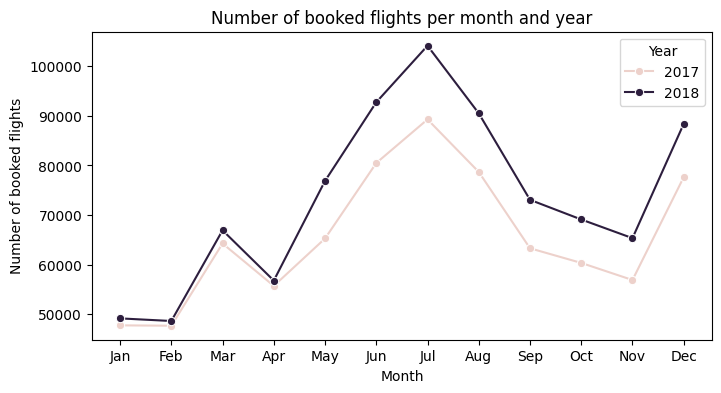

'The line chart demonstrates a similar trend for both years, with a higher number of bookings in 2018. In both years, flight bookings experience a significant increase from April to mid-July, \nfollowed by a decline, before rising again as December approaches.'

In [503]:
# Using a lineplot.

merged_df_grouped = merged_df.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index() #grouping before visualising. 

plt.figure(figsize=(8,4))
sns.lineplot(data=merged_df_grouped, x='Month', y='Flights Booked', hue='Year', marker='o')
plt.title('Number of booked flights per month and year')
plt.xlabel('Month')
plt.ylabel('Number of booked flights')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

'''The line chart demonstrates a similar trend for both years, with a higher number of bookings in 2018. In both years, flight bookings experience a significant increase from April to mid-July, 
followed by a decline, before rising again as December approaches.'''

### Is there a relationship between the distance of flights and the points accumulated by the customers?

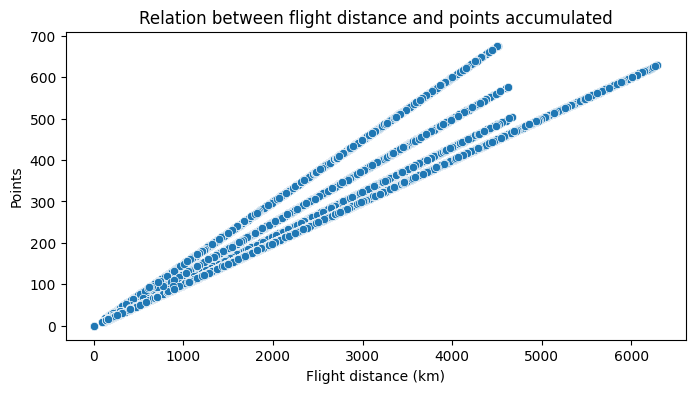

'We can see a positive correlation between flight distance and points. Points go up as flight distance increases.'

In [502]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=merged_df, x='Distance', y='Points Accumulated')
plt.title('Relation between flight distance and points accumulated')
plt.xlabel('Flight distance (km)')
plt.ylabel('Points')
plt.show()

'''We can see a positive correlation between flight distance and points. Points go up as flight distance increases.'''

### What is the distribution of customers by province?

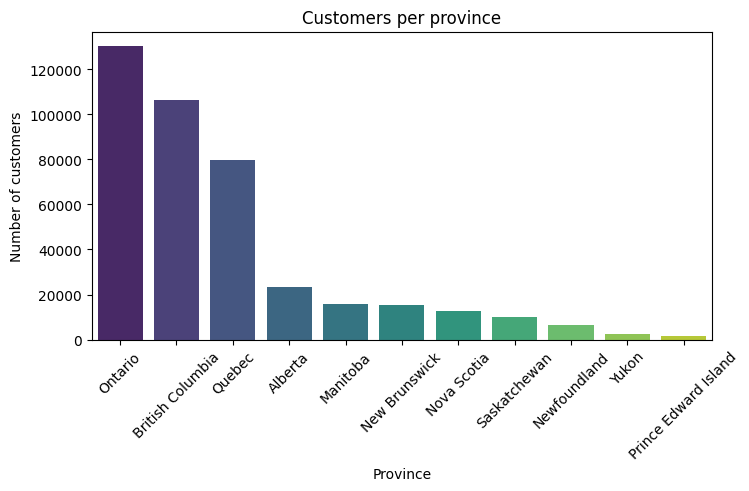

'The majority of customers are located in Ontario, British Columbia, and Quebec, with customer counts ranging from approximately 78,000 to 135,000.\nThe provinces with the fewest customers are Newfoundland, Yukon, and Prince Edward Island, each having fewer than 10,000 customers.'

In [500]:
province_counts = merged_df['Province'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=province_counts.index, y=province_counts.values, palette='viridis')
plt.title('Customers per province')
plt.xlabel('Province')
plt.ylabel('Number of customers')
plt.xticks(rotation=45)
plt.show()

'''The majority of customers are located in Ontario, British Columbia, and Quebec, with customer counts ranging from approximately 78,000 to 135,000.
The provinces with the fewest customers are Newfoundland, Yukon, and Prince Edward Island, each having fewer than 10,000 customers.'''

### How does the average salary compare across different education levels?

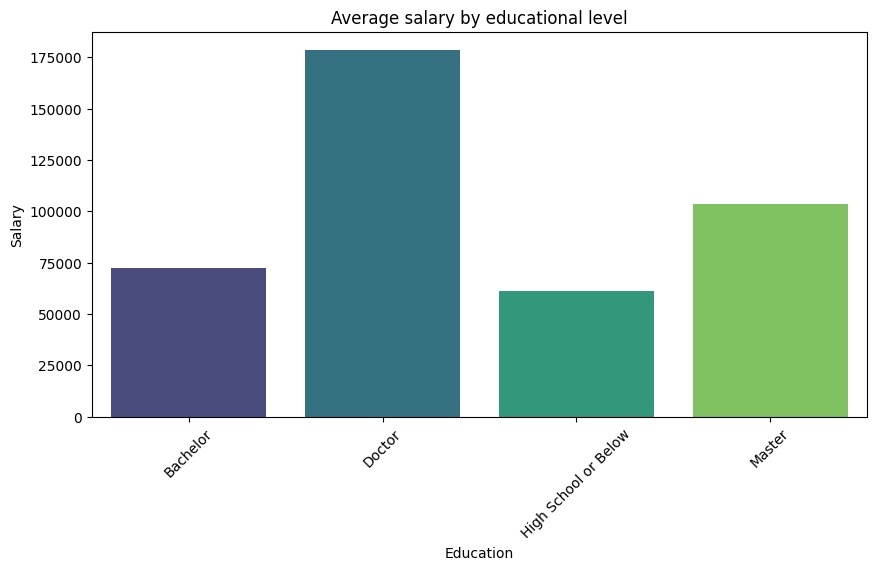

'The visualisation shows the average salary increases with the level of education. Generally, higher educational attainment is associated with higher salaries'

In [501]:
education_filter = merged_df.loc[merged_df['Education'] != 'College'].reset_index() # Customers with Education 'College' have no salary details.

average_salary_education = education_filter.groupby('Education')['Salary'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data = average_salary_education, x='Education', y='Salary', palette='viridis')
plt.title('Average salary by educational level')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

'''The visualisation shows the average salary increases with the level of education. Generally, higher educational attainment is associated with higher salaries'''

### What is the proportion of customers with different types of loyalty cards?

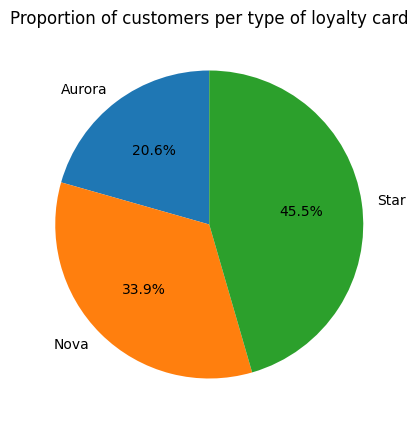

In [475]:
# Converting column 'Loyalty Number' to numeric. Cells with no numeric value will be converted to Nan. 
merged_df['Loyalty Number'] = pd.to_numeric(merged_df['Loyalty Number'], errors='coerce')

# Number of customers per type of Fidelity Card.
count_loyalty_number = merged_df.groupby('Loyalty Card')['Loyalty Number'].count().reset_index()

# Total number of customers.
total_customers = len(merged_df)

# Proportions in %.
loyalty_proportion = (count_loyalty_number['Loyalty Number'] / total_customers) * 100

# Pie chart.
plt.figure(figsize=(5, 5))
plt.pie(loyalty_proportion, labels=count_loyalty_number['Loyalty Card'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of customers per type of loyalty card')
plt.show()

### How are customers distributed according to their marital status and gender?

'The chart below illustrates that the majority of customers are married, with significantly more customers compared to single and divorced customers. \nThe gender distribution remains relatively balanced across all three categories.'

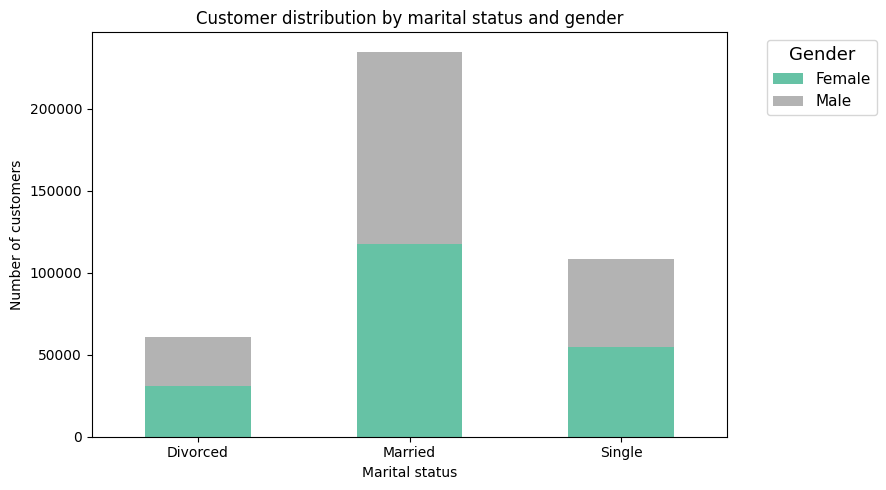

In [506]:
# Grouping columns, then creating a pivot where marital status become rows, gender become columns and loyalty number is the value being aggregated.

merged_df_grouped1 = merged_df.groupby(['Marital Status', 'Gender'])['Loyalty Number'].count().reset_index()
pivot_df = merged_df_grouped1.pivot(index='Marital Status', columns='Gender', values='Loyalty Number').fillna(0)

ax = pivot_df.plot(kind='bar', stacked=True, figsize=(9, 5), colormap='Set2')

plt.title('Customer distribution by marital status and gender')
plt.xlabel('Marital status')
plt.ylabel('Number of customers')
plt.xticks(rotation=0) 
plt.legend(title='Gender', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

'''The chart below illustrates that the majority of customers are married, with significantly more customers compared to single and divorced customers. 
The gender distribution remains relatively balanced across all three categories.'''

# Evaluation of Differences in Flight Bookings by Educational Level

In [ ]:
# Creating df with the columns we want to analyse and analysing stats.

merg_df_flights_education = merged_df[['Flights Booked', 'Education']]
merg_df_flights_education.groupby('Education')['Flights Booked'].describe().T

Education,Bachelor,College,Doctor,High School or Below,Master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


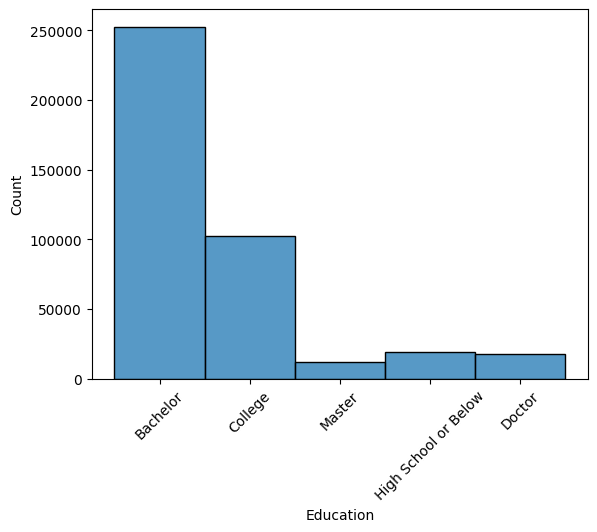

In [ ]:
# Checking the distribution of the data with a quick visualisation.

sns.histplot(x='Education', data=merg_df_flights_education)
plt.xticks(rotation=45);

In [514]:
def normal_distribution(dataframe, column):
    # norm means that the standard normal distribution is used in the test.
    statistic, p_value = stats.kstest(dataframe[column], 'norm')
    
    if p_value > 0.05:
        print(f"For {column}, the data follows a normal distribution.")
    else:
        print(f"For {column}, the data does not follow a normal distribution.")

In [515]:
normal_distribution(merg_df_flights_education, 'Flights Booked')

For Flights Booked, the data does not follow a normal distribution.


In [482]:
def homogeneity(dataframe, column, metric_column):
    values_evaluate = []
    
    # Iterates in categoric columns.

    for value in dataframe[column].unique():
        # Extracts values of metric_column as a list. 
        group_values = dataframe[dataframe[column] == value][metric_column].tolist() # .tolist converts df values in flat lists.
        values_evaluate.append(group_values)
    
    statistic, p_value = stats.levene(*values_evaluate) # *values evaluate unpacks the groups in the call to stats.levene
    
    if p_value > 0.05:
        print(f"For the metric {metric_column}, the variances are homogeneus between groups.")
    else:
        print(f"For the metric {metric_column}, the variances are NOT homogeneus between groups.")

In [483]:
homogeneity(merg_df_flights_education, 'Education', 'Flights Booked')

For the metric Flights Booked, the variances are NOT homogeneus between groups.


In [484]:
# Since the distribution between groups is not normal and the variances are not homogeneus, we will use the Kruskal-Wallis H test
# to evaluate if there are significant differences between the medians of each group. 

group_data = [merg_df_flights_education[merg_df_flights_education['Education'] == level]['Flights Booked'] for level in merg_df_flights_education['Education'].unique()]
statistic, p_value = kruskal(*group_data)

if p_value < 0.05:
    print("There are significant differences between groups.")
else:
    print("Thereare NOT significant differences between groups.")



There are significant differences between groups.


In [ ]:
# The Kruskal-Wallis test identifies whether there are differences between groups, but it does not reveal the specific relationships between them. 
# To explore these relationships further, a post-hoc comparison is required. 

posthoc = posthoc_dunn(merg_df_flights_education, val_col='Flights Booked', group_col='Education', p_adjust='bonferroni') # bonferroni is used to reduce the risk of errors in multiple testing.
posthoc.reset_index()

# The table below shows significant differences in the number of flights booked between customers with a Bachelor's degree and those with College education. 
# However, there are no significant differences in flight bookings between customers from other educational levels.

,index,Bachelor,College,Doctor,High School or Below,Master
0,Bachelor,1.000000,0.022735,0.949079,0.362961,0.142438
1,College,0.022735,1.000000,1.000000,1.000000,1.000000
2,Doctor,0.949079,1.000000,1.000000,1.000000,1.000000
3,High School or Below,0.362961,1.000000,1.000000,1.000000,1.000000
4,Master,0.142438,1.000000,1.000000,1.000000,1.000000


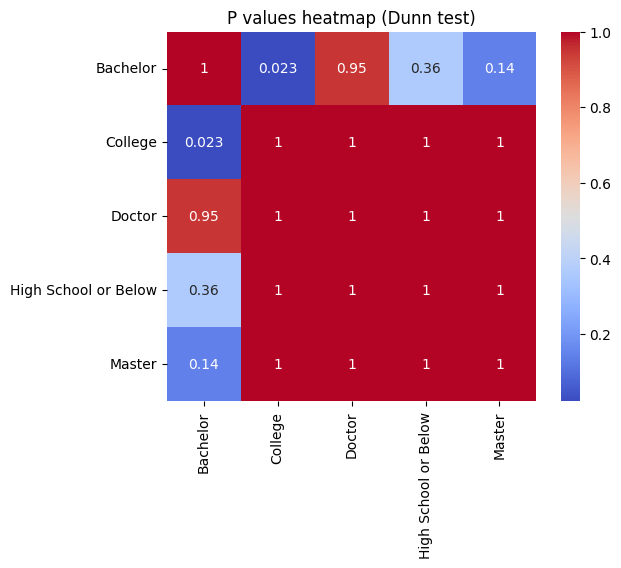

In [516]:
# Crating a heatmap with the post-hoc p values for ease of reference.

sns.heatmap(posthoc, annot=True, cmap="coolwarm", cbar=True, square=True)
plt.title("P values heatmap (Dunn test)")
plt.show()